In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the housing dataset

#df_ad_housing = pd.read_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/merged_datasets.csv')
df_ad_housing = pd.read_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/Additional_Dataset_wo_null_ayushya.csv', index_col=0)
df_ad_housing.head()
#df_ad_housing.head()

,price,house_type_2,rooms,m2,elevator,garage,neighborhood,district,house_type_,floor
0,495000,exterior,3,118.0,True,True,Chopera,Arganzuela,Apartment,1
1,485000,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela,Apartment,2
2,315000,exterior,2,72.0,False,False,Legazpi,Arganzuela,Apartment,2
3,585000,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela,Apartment,4
4,255000,exterior,3,75.0,False,False,Acacias,Arganzuela,bajo,0


#### Basic Analysis

In [3]:
df_ad_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12391 entries, 0 to 15974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12391 non-null  int64  
 1   house_type_2  12391 non-null  object 
 2   rooms         12391 non-null  int64  
 3   m2            12391 non-null  float64
 4   elevator      12391 non-null  bool   
 5   garage        12391 non-null  bool   
 6   neighborhood  12391 non-null  object 
 7   district      12391 non-null  object 
 8   house_type_   12391 non-null  object 
 9   floor         12391 non-null  int64  
dtypes: bool(2), float64(1), int64(3), object(4)
memory usage: 895.4+ KB


<Axes: xlabel='house_type_2', ylabel='count'>

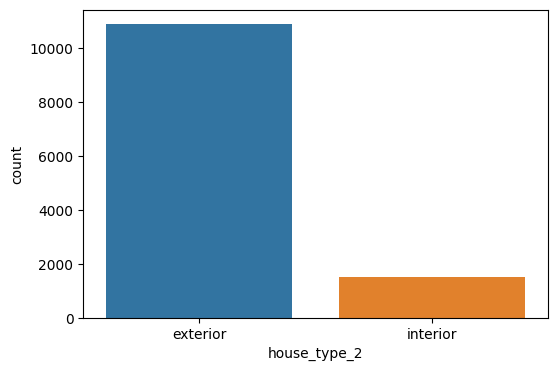

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='house_type_2',data=df_ad_housing)


<Axes: xlabel='elevator', ylabel='count'>

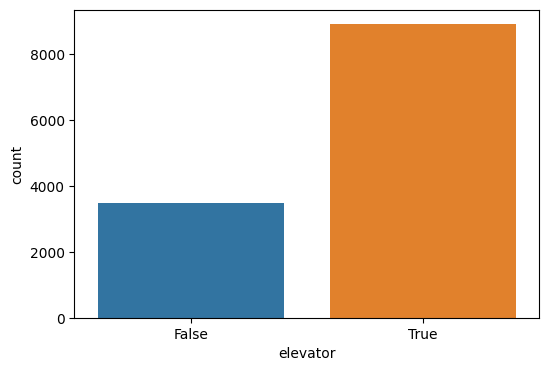

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='elevator',data=df_ad_housing)

<Axes: xlabel='garage', ylabel='count'>

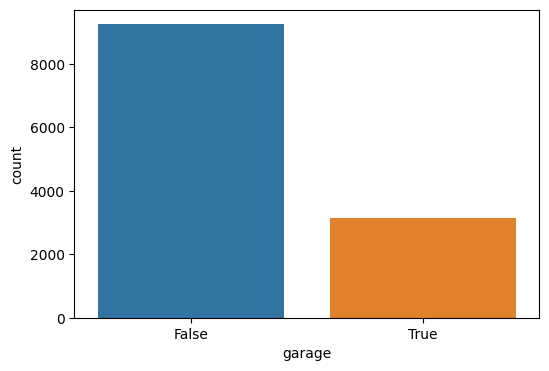

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='garage',data=df_ad_housing)

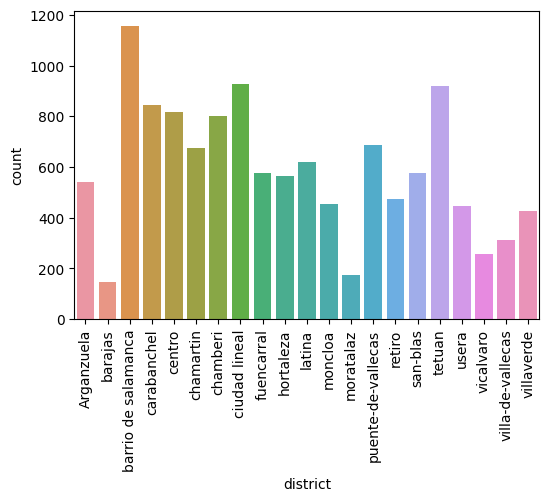

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='district',data=df_ad_housing)
plt.xticks(rotation = 90)
plt.show()

In [8]:
import unicodedata
import re

# Function to remove digits
def remove_digits(name):
    # Remove digits
    name = re.sub(r'\d+', '', name)
    # Remove hyphens
    name = re.sub(r'-', ' ', name)
    # Strip leading and trailing whitespaces
    name = name.strip()
    return name

# Function to remove accents
def remove_accents(name):
    nfkd_form = unicodedata.normalize('NFKD', name)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the functions
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].str.lower()
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].apply(remove_digits)
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].apply(remove_accents)




/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


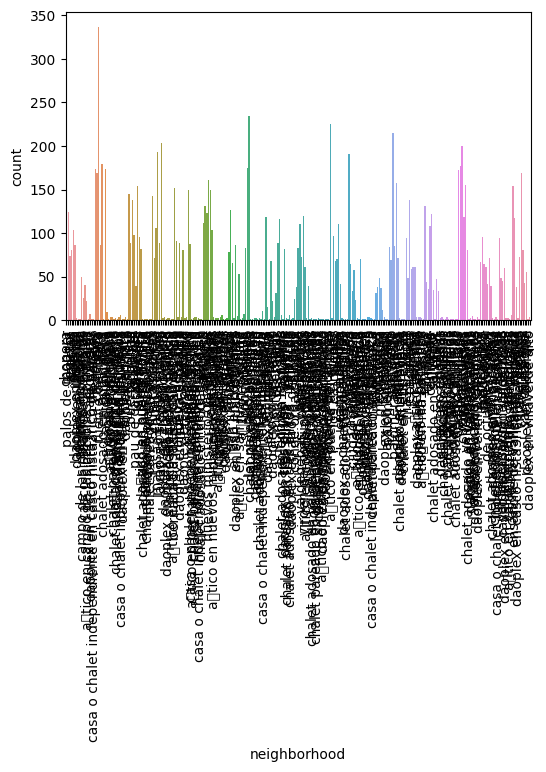

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='neighborhood',data=df_ad_housing)
plt.xticks(rotation = 90)
plt.show()

#### Advanced Analysis

<Axes: >

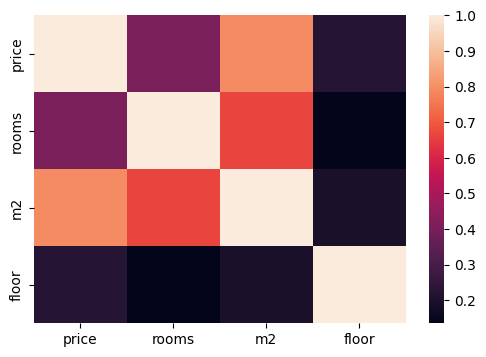

In [10]:
numeric_cols = df_ad_housing.select_dtypes(include=['float64','int64']).columns
df_ad_housing[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_ad_housing[numeric_cols].corr())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


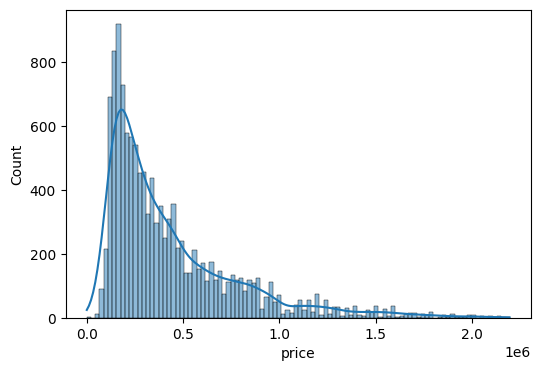

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['price'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


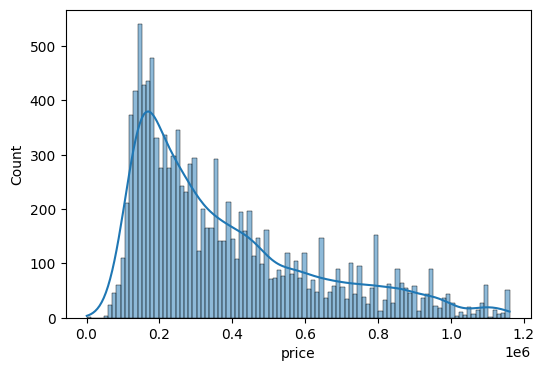

In [12]:
q = df_ad_housing['price'].quantile(0.95)

df_ad_housing = df_ad_housing[df_ad_housing['price']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['price'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


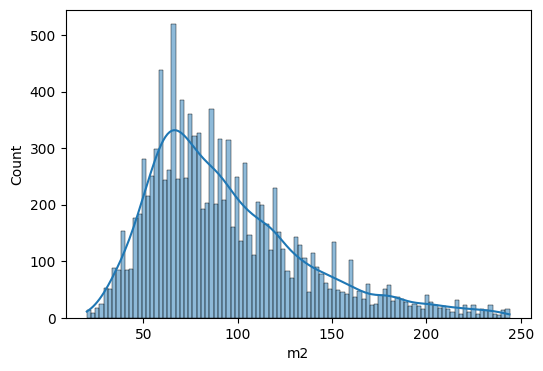

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['m2'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


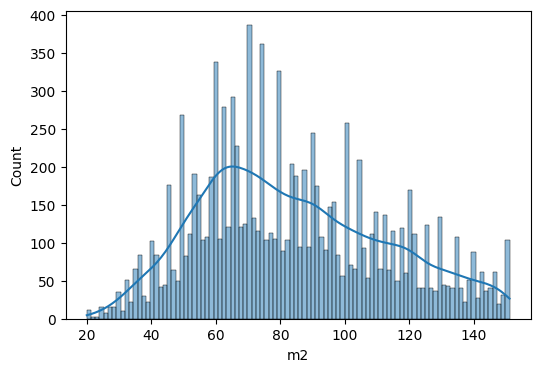

In [14]:
q = df_ad_housing['m2'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['m2']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['m2'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


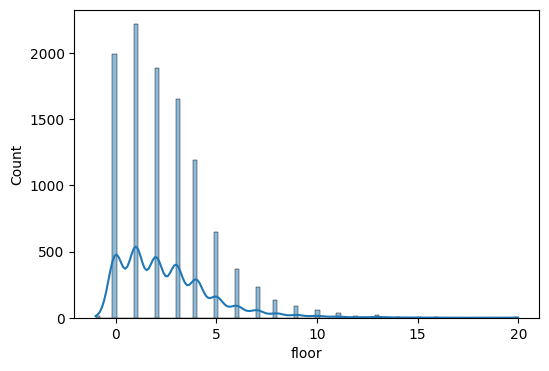

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['floor'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


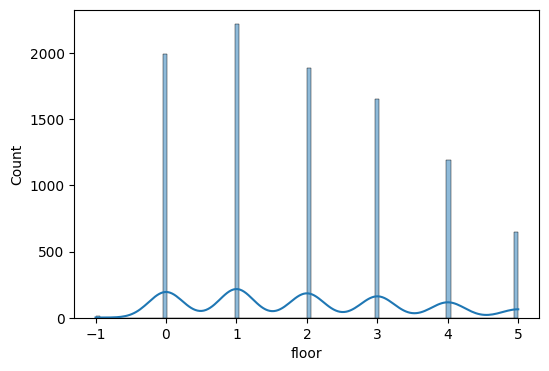

In [16]:
q = df_ad_housing['floor'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['floor']<=q]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['floor'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


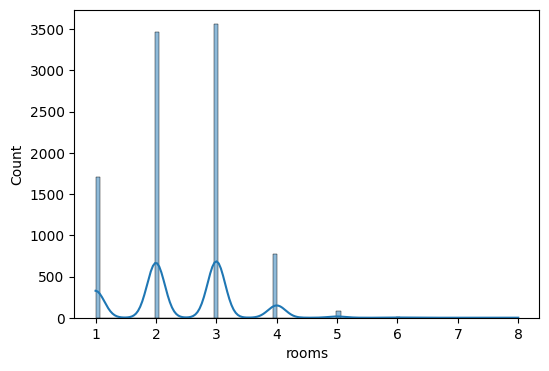

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['rooms'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


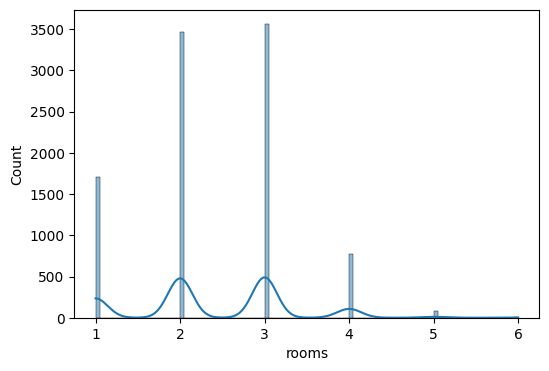

In [18]:
#q = df_ad_housing['rooms'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['rooms']<=6]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['rooms'],bins=100, kde=True)
plt.show()

In [19]:
df_ad_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9593 entries, 0 to 15974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9593 non-null   int64  
 1   house_type_2  9593 non-null   object 
 2   rooms         9593 non-null   int64  
 3   m2            9593 non-null   float64
 4   elevator      9593 non-null   bool   
 5   garage        9593 non-null   bool   
 6   neighborhood  9593 non-null   object 
 7   district      9593 non-null   object 
 8   house_type_   9593 non-null   object 
 9   floor         9593 non-null   int64  
dtypes: bool(2), float64(1), int64(3), object(4)
memory usage: 693.2+ KB


In [20]:
df_ad_housing.isna().sum()

price           0
house_type_2    0
rooms           0
m2              0
elevator        0
garage          0
neighborhood    0
district        0
house_type_     0
floor           0
dtype: int64

#### Visualizing each feature vs price

In [21]:
df_ad_housing.drop(df_ad_housing[(df_ad_housing['m2'] == 60) & (df_ad_housing['price'] < 1000)].index, inplace=True)

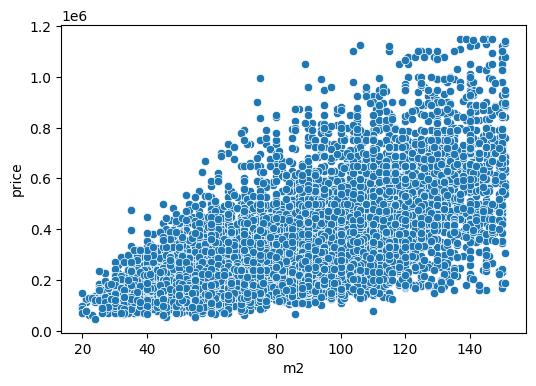

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'm2',
    y = 'price',
    data= df_ad_housing)
plt.show()

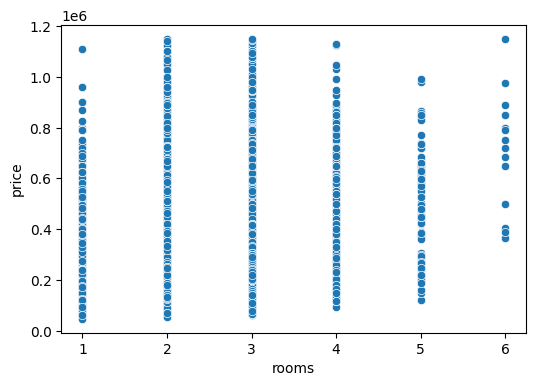

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'rooms',
    y = 'price',
    data= df_ad_housing)
plt.show()

In [24]:
#df_ad_housing['rooms'].replace(0,1,inplace=True)

In [25]:
df_ad_housing['rooms'].value_counts()

rooms
3    3558
2    3466
1    1700
4     775
5      79
6      14
Name: count, dtype: int64

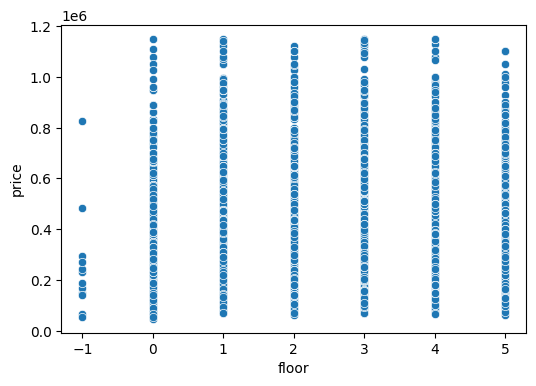

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'floor',
    y = 'price',
    data= df_ad_housing)
plt.show()

In [27]:
#df_normalized = df_ad_housing.to_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/df_normalized.csv')

In [28]:
from pycaret.regression import *

In [29]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df_ad_housing,
    #test_data=test_data,
    target = 'price',
    session_id=9,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    #remove_multicollinearity=True,
    #multicollinearity_threshold = 0.9,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore',
    #pca=True,
    #pca_components='mle',
    log_data=False,
    log_experiment=False
    )

,Description,Value
0,Session id,9
1,Target,price
2,Target type,Regression
3,Original data shape,"(9592, 10)"
4,Transformed data shape,"(9592, 36)"
5,Transformed train set shape,"(6714, 36)"
6,Transformed test set shape,"(2878, 36)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [35]:
best_models = compare_models(cross_validation=True,
                             n_select=5,
                             )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,48211.7813,5408887741.6613,73454.7720,0.8583,0.2025,0.1590,0.3400
et,Extra Trees Regressor,48724.5612,5655080525.5329,75110.6370,0.8519,0.2098,0.1617,0.2380
rf,Random Forest Regressor,49371.3545,5778926847.5394,75925.1313,0.8486,0.2091,0.1635,0.2360
gbr,Gradient Boosting Regressor,52692.7891,6183972891.7535,78574.7119,0.8379,0.2189,0.1754,0.1390
knn,K Neighbors Regressor,59283.7502,7946783891.6998,89029.9080,0.7921,0.2438,0.1938,0.0550
ridge,Ridge Regression,66551.3258,8588195505.2770,92585.1398,0.7757,0.4475,0.2505,0.0420
llar,Lasso Least Angle Regression,66554.2415,8588241727.0098,92585.4210,0.7757,0.4453,0.2505,0.0410
br,Bayesian Ridge,66508.0312,8587965181.7647,92583.4109,0.7757,0.4389,0.2501,0.0430
lasso,Lasso Regression,66554.3452,8588250871.8511,92585.4709,0.7757,0.4452,0.2505,0.1200
lr,Linear Regression,66555.5946,8589224112.4522,92590.5643,0.7757,0.4486,0.2505,0.0400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [36]:
best_model = stack_models(best_models, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45707.3536,4436112684.4286,66604.1492,0.8784,0.1986,0.1588
1,47110.2349,5138328178.7252,71682.1329,0.8725,0.1977,0.1533
2,46823.7886,6059975139.9747,77845.8421,0.8341,0.2017,0.1524
3,48216.5543,5778128875.0471,76014.0045,0.8645,0.2030,0.1597
4,47707.1755,4772306165.6556,69081.8802,0.8517,0.2038,0.1644
5,48020.0553,5389551289.7757,73413.5634,0.8603,0.2010,0.1531
6,45669.9644,4812869115.6076,69374.8450,0.8721,0.1893,0.1462
7,46615.1041,4834382027.1340,69529.7205,0.8704,0.1923,0.1524
8,47095.2663,5441167983.2421,73764.2731,0.8718,0.1950,0.1473


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [37]:
#et = create_model('et')
#lbgm = create_model('lightgbm')

In [38]:
# ensemble with bagging
#ensemble_model_ = ensemble_model(et, method = 'Bagging')

In [39]:
# ensemble with boosting
#ensemble_model_ = ensemble_model(et, method = 'Boosting')

In [40]:
# blend top 3 models
#blend_model_ = blend_models(best_models)

In [41]:
holdout_pred = predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,46701.2254,4916078743.1137,70114.7541,0.8727,0.1982,0.1545


In [42]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
9941,183000,169178.962271
10646,265000,277199.417607
6522,640000,830350.087573
3325,105000,103138.964383
1710,605000,547281.531734


In [43]:
holdout_pred['difference'] = abs(holdout_pred['price'] - holdout_pred['prediction_label'])
holdout_pred[['price','prediction_label','difference']].describe()

,price,prediction_label,difference
count,2.878000e+03,2.878000e+03,2878.000000
mean,3.183504e+05,3.189457e+05,46701.225372
std,1.965758e+05,1.831313e+05,52307.025921
min,5.500000e+04,8.440932e+04,21.745584
25%,1.676250e+05,1.747816e+05,12627.572323
50%,2.594500e+05,2.610897e+05,29925.093905
75%,4.150000e+05,4.229968e+05,61094.893094
max,1.150000e+06,1.052331e+06,486869.192314


<Axes: xlabel='difference'>

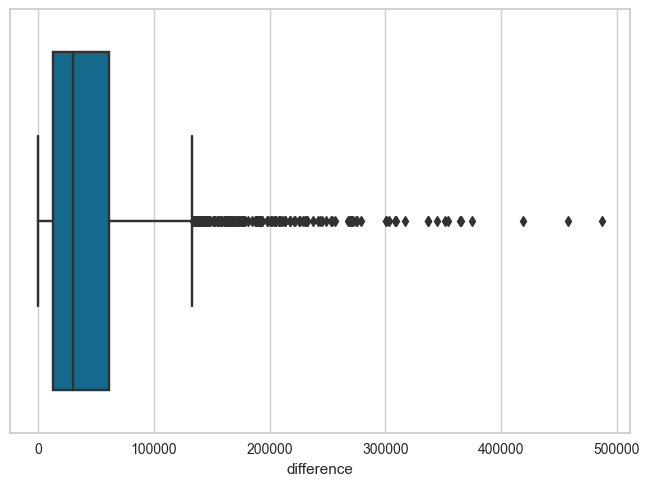

In [44]:
sns.boxplot(
    data=holdout_pred,
    x='difference'
)

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(holdout_pred['price'], holdout_pred['prediction_label'])

46701.22537171033

In [46]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(holdout_pred['price'], holdout_pred['prediction_label']))
print(RMSE)

70114.75410435154


In [47]:
from sklearn.metrics import explained_variance_score
explained_variance_score(holdout_pred['price'], holdout_pred['prediction_label'])

0.8727439895432009

In [48]:
NRMSE = RMSE/(max(holdout_pred['price']) - min(holdout_pred['price']))
print('NRMSE: ', NRMSE)

NRMSE:  0.0640317389080836


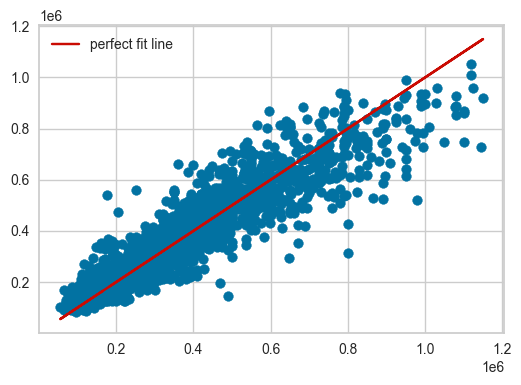

In [49]:
plt.figure(figsize=(6,4))

# Our predictions
plt.scatter(holdout_pred['price'], holdout_pred['prediction_label']);

# Perfect predictions
plt.plot(holdout_pred['price'], holdout_pred['price'], color='r', label='perfect fit line')
plt.legend()